### Many-body Entanglement and Tensor Networks
Tutorials based on the 2017 Perimeter Scholar International Condensed Matter Review course taught by Guifre Vidal

# <span style="color:#0C45A9">Python tutorial 5</span>

In [1]:
import numpy as np

## 5.1. Entanglement and correlations

### 5.1.1. Computing entanglement entropy

Define function to calculate entropy from the density matrix eigenvalues (probabilities)

In [2]:
def entanglement_entropy_from_p(p):
    entropy = np.sum(np.array([-p_i*np.log2(p_i) for p_i in p if p_i > 0]))
    return entropy

Let's try this function for a random $N=15$ qubit state where we compute the entropy of the first 3 qubits.

In [3]:
N= 15
N_entropy = 3

Psi = np.random.normal(size = 2**N)+1j*np.random.normal(size = 2**N)
Psi = Psi/np.linalg.norm(Psi)
#reshape state and compute rho
M = np.reshape(Psi, (2**N_entropy, 2**(N-N_entropy)))
rho = M.dot(M.conj().T)
#obtain eigenvalues p_i
p, U = np.linalg.eig(rho) 
p = np.real(p)

ent_entropy = entanglement_entropy_from_p(p)
print("Entanglement entropy for the first 3 qubits:", ent_entropy)

Entanglement entropy for the first 3 qubits: 2.998697811905438


Compute sequence of entangement entropy and spectrum for $\psi$ at different bi-partitions:

In [81]:
def entropies_and_spectra_from_psi(Psi):
    L = len(Psi)  # Dimension of the vector space
    N = round(np.log2(L))  # Number of sites
    p = N//2 # N/2 or (N-1)/2 partitions -> 2**p is the most number of eigenvalues rho can have
    EE = np.zeros(p) #entanglement entropy
    ES = np.zeros((2**p, p)) #entanglement spectrum
    for n in range(1,p+1):
        M = np.reshape(Psi, (2**(n),2**(N-n))) #partition into 2 subsystems to create matrix
        rho = M.dot(M.conj().T) #reduced density matrix
        p, U = np.linalg.eig(rho) #obtain eivenvalues p_i
        p = np.real(p) # to remove imaginary parts
        p_sorted = -np.sort(-p) #sort
        #fill with zeros to get size 2**(N//2)
        pad_w = 2**(N//2)-2**n 
        p = np.pad(p, (0, pad_w), 'constant')
        #store
        ES[:,n-1] = p  
        EE[n-1] = entanglement_entropy_from_p(p)
    return ES,EE

In [30]:
N = 6
Psi_0 = np.random.rand(2**N)+1j*np.random.rand(2**N)
Psi_0 = Psi_0/np.linalg.norm(Psi_0)
ES,EE = entropies_and_spectra_from_psi(Psi_0)

### 5.1.2. Computing correlations

Define function to compute correlator.

In [9]:
def compute_correlator(Psi,Q): #Q has to be a 2x2 matrix
    L = len(Psi)  # Dimension of the vector space
    N = round(np.log2(L))  # Number of sites
    Corr = np.zeros(N-1)
    PsiY = np.reshape(Psi, (2,2**(N-1)))
    PsiY = Q.dot(PsiY)
    Y = np.reshape(PsiY, L)
    Y = Psi.conj().T.dot(Y)
    for n in range(N-1):
        PsiY = np.reshape(PsiY, (2, 2**(N-1)))
        Psi0 = np.reshape(Psi, (2, 2**(N-1)))     
        PsiY = PsiY.T
        Psi0 = Psi0.T
        
        PsiXY = np.reshape(PsiY,(2,2**(N-1)))
        PsiXY = Q.conj().T.dot(PsiXY)
        PsiXY = np.reshape(PsiXY,L)
        bra = np.reshape(Psi0,(1,L))
        XY = (bra.dot(PsiXY))[0]
        PsiX = np.reshape(Psi0,(2,2**(N-1)))
        PsiX = Q.dot(PsiX)
        PsiX = np.reshape(PsiX, L)
        X = (bra.dot(PsiX))[0]

        Corr[n] = np.abs(XY - X.conj()*Y)
        
    return Corr

In [10]:
N = 4

Psi = np.random.normal(size = 2**N)+1j*np.random.normal(size = 2**N)
Psi = Psi/np.linalg.norm(Psi)

Q = np.random.normal(size = (2,2))+1j*np.random.normal(size = (2,2))
Q = Q/np.linalg.norm(Q)

correlator = compute_correlator(Psi, Q)

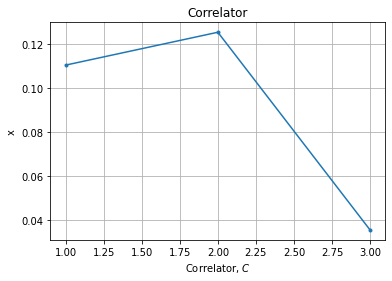

In [11]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.title("Correlator")
plt.grid()
plt.ylabel("x")
plt.xlabel(r"Correlator, $C$")
plt.plot(np.arange(1,len(correlator)+1), correlator, ls = '-', marker = '.')
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

### 5.1.3. Random $N$ qubit state

### 5.1.3.1. Entanglement in random $N$ qubit state

Generate a random state of $N$ qubits. We will see that the entropy of this random state is almost maximal. Maximal entropy occurs when:<br>
<br>
<center>$p_i =(\frac{1}{\dim(\mathcal{H})},\frac{1}{\dim(\mathcal{H})},...)$ and it is $S_{max}=\log_2(\dim{\mathcal{H}})= \log_2(2^N)=N$. <center>

In [66]:
N=20

Psi = np.random.normal(size = 2**N)+1j*np.random.normal(size = 2**N)
Psi = Psi/np.linalg.norm(Psi)

ent_spectra, ent_entropy = entropies_and_spectra_from_psi(Psi)

Check that each spectra adds up to 1.

In [67]:
for i in range(np.shape(ent_spectra)[1]):
    if not np.allclose(1,np.sum(ent_spectra[:,i])):
        print("At least one of the spectra doesn't add up to 1.")

Plot spectrum for one partition. Let's do it for the last one since it will have the most number of $\rho$ eigenvalues.

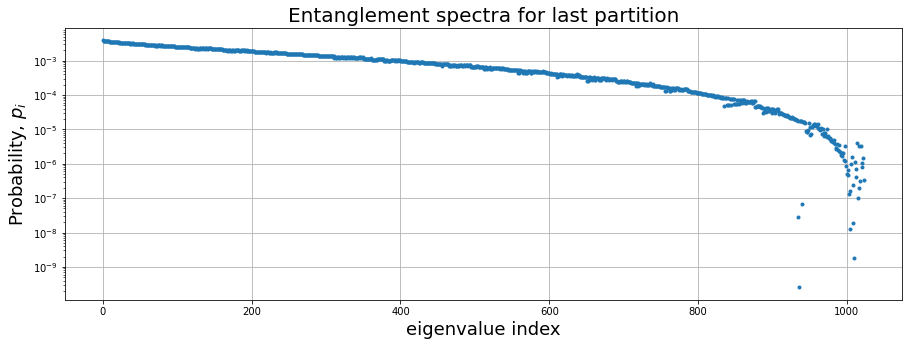

In [84]:
plt.title("Entanglement spectra for last partition", fontsize=20)
plt.grid()
plt.xlabel("eigenvalue index",fontsize=18)
plt.ylabel(r"Probability, $p_i$",fontsize=18)
plt.yscale("log")
plt.plot(ent_spectra[:,-1], ".")
plt.rcParams["figure.figsize"] = (8,2)
plt.show()

Plot spectra for all partitions.

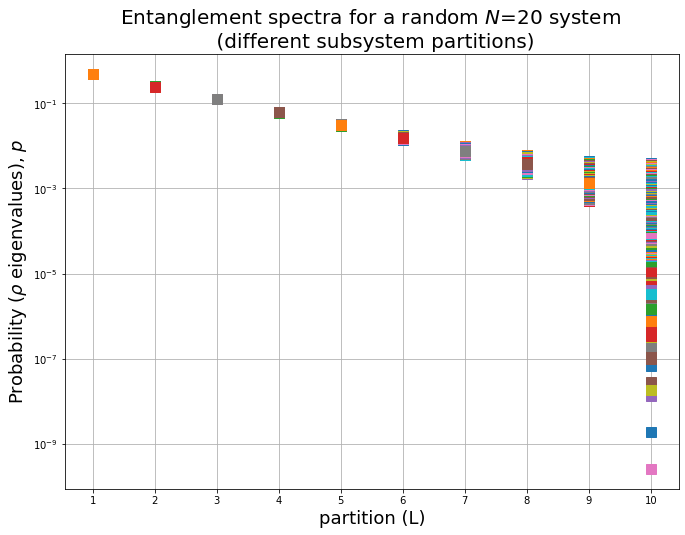

In [75]:
plt.title(r"Entanglement spectra for a random $N$=" +str(N)+" system \n (different subsystem partitions)", fontsize=20)
plt.grid()
plt.xlabel("partition (L)",fontsize=18)
plt.ylabel(r"Probability ($\rho$ eigenvalues), $p$",fontsize=18)
plt.yscale("log")
for i in range(np.shape(ent_spectra)[0]):
    plt.plot(np.arange(1,N//2+1), ent_spectra[i,:], "s", ms=10)
    plt.xticks(np.arange(1,N//2+1))
plt.show()

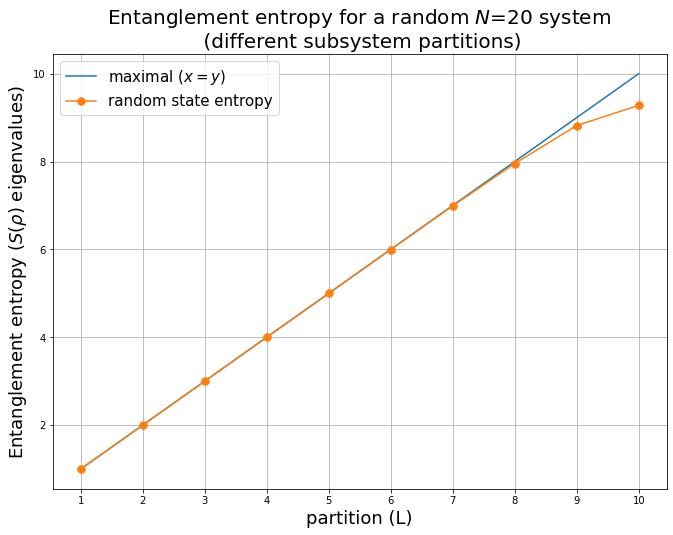

In [79]:
plt.title("Entanglement entropy for a random $N$=" +str(N)+" system \n (different subsystem partitions)", fontsize=20)
plt.grid()
plt.xlabel("partition (L)",fontsize=18)
plt.ylabel(r"Entanglement entropy ($S(\rho)$ eigenvalues)",fontsize=18)
plt.plot(np.arange(1,N//2+1),np.arange(1,N//2+1), label=r'maximal ($x=y$)')
plt.plot(np.arange(1,N//2+1), ent_entropy, ".", ls='-', ms=15, label = 'random state entropy')
plt.xticks(np.arange(1,N//2+1))
plt.legend(fontsize=15)
plt.show()

#### Entropy is almost maximal!

### 5.1.3.2. Correlations in random $N$ qubit state

In [88]:
Q = np.array([[0,1],[1,0]])

corr = compute_correlator(Psi, Q)

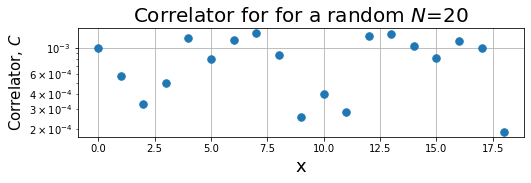

In [90]:
plt.title("Correlator for for a random $N$=" +str(N), fontsize=20)
plt.grid()
plt.xlabel("x",fontsize=18)
plt.ylabel(r"Correlator, $C$",fontsize=15)
plt.yscale("log")
plt.plot(corr, ".", ms=15)
plt.rcParams["figure.figsize"] = (15,4)
plt.show()

### 5.1.4. Ground $N$ qubit state

### 5.1.4.1. Entanglement in ground state